In [1]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from matplotlib import style
import sklearn
import warnings
from sklearn import linear_model
from sklearn.model_selection import train_test_split
warnings.simplefilter(action = "ignore", category = FutureWarning)
%matplotlib inline
import seaborn as sns
from matplotlib import cm as cm
from textblob import TextBlob
from sklearn.feature_selection import chi2, SelectKBest

In [2]:
data = pd.read_csv('processed_posts.csv')

In [4]:
blobs = [TextBlob(sentence) for sentence in data.title]
data['polarity'] = [blob.sentiment.polarity for blob in blobs]
data['subjectivity'] = [blob.sentiment.subjectivity for blob in blobs]
data['noun_phrases'] = [len(blob.noun_phrases) for blob in blobs]

data['gt20'] = data['ups'] > 20
data['wordcount'] = data['title'].str.split().apply(len)
data['charcount'] = data.title.str.len()
data['vowels'] = data.title.str.findall(r'[aeiou]').apply(len)
data['consonants'] = data.title.str.findall(r'[^aeiou]').apply(len)

In [16]:
train_X, test_X, train_y, test_y = train_test_split(data.title, 
                                                    data.gt20, 
                                                    test_size=0.20,
                                                    random_state=42)

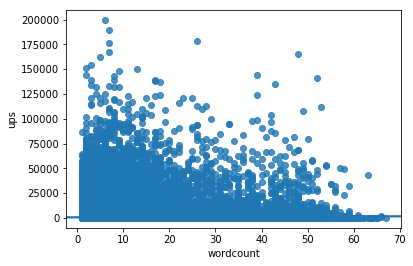

In [4]:
sns.regplot(x='wordcount',y='ups', data=data)

In [22]:
df = data[['ups','wordcount','charcount','vowels','consonants', 'polarity', 'subjectivity', 'noun_phrases']]

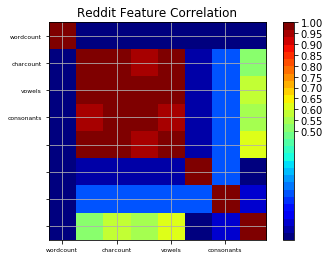

In [23]:
fig = plt.figure()
ax1 = fig.add_subplot(111)
cmap = cm.get_cmap('jet', 30)
cax = ax1.imshow(df.corr(), interpolation="nearest", cmap=cmap)
ax1.grid(True)
plt.title('Reddit Feature Correlation')
labels=['ups','wordcount', 'charcount', 'vowels', 'consonants',]
ax1.set_xticklabels(labels,fontsize=6)
ax1.set_yticklabels(labels,fontsize=6)
# Add colorbar, make sure to specify tick locations to match desired ticklabels
fig.colorbar(cax, ticks=[.5, .55, .6,.65,.7,.75,.8,.85,.90,.95,1])
plt.show()

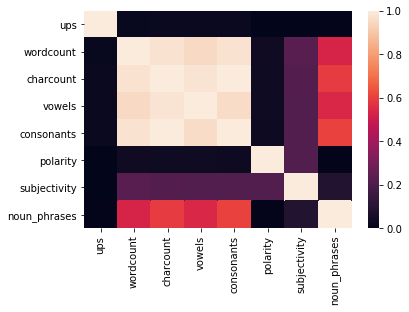

In [24]:
corr = df.corr()
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns)

In [25]:
cmap = cmap=sns.diverging_palette(5, 250, as_cmap=True)

def magnify():
    return [dict(selector="th",
                 props=[("font-size", "7pt")]),
            dict(selector="td",
                 props=[('padding', "0em 0em")]),
            dict(selector="th:hover",
                 props=[("font-size", "12pt")]),
            dict(selector="tr:hover td:hover",
                 props=[('max-width', '200px'),
                        ('font-size', '12pt')])
]

corr.style.background_gradient(cmap, axis=1)\
    .set_properties(**{'max-width': '80px', 'font-size': '10pt'})\
    .set_caption("Hover to magify")\
    .set_precision(2)\
    .set_table_styles(magnify())

,ups,wordcount,charcount,vowels,consonants,polarity,subjectivity,noun_phrases
ups,1,0.023,0.024,0.027,0.023,0.00031,-0.00045,0.0071
wordcount,0.023,1,0.98,0.95,0.98,0.041,0.23,0.53
charcount,0.024,0.98,1,0.98,1,0.035,0.22,0.59
vowels,0.027,0.95,0.98,1,0.96,0.037,0.21,0.54
consonants,0.023,0.98,1,0.96,1,0.034,0.21,0.61
polarity,0.00031,0.041,0.035,0.037,0.034,1,0.21,0.0069
subjectivity,-0.00045,0.23,0.22,0.21,0.21,0.21,1,0.091
noun_phrases,0.0071,0.53,0.59,0.54,0.61,0.0069,0.091,1
